In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pylab as pylab

params = {'axes.labelsize': 'xx-large',
          'xtick.labelsize': 'xx-large',
          'ytick.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'legend.fontsize': 'xx-large'}
pylab.rcParams.update(params)

In [3]:
df_abs_diff_bline = pd.read_csv(r'default SAC 500 norm space results\baseline_obs-a.csv',
                                            index_col=0,
                                            usecols = lambda x: x != 'actions', #excludes a col
                                            ).diff().abs()
df_abs_diff_stealthy_sac = pd.read_csv(r'default SAC 500 norm space results\untargeted_binary_myPGD_03_mask_solar_and_time_scale_consumption_eps_clipped_adv_obs_adv_obs-a.csv',
                                            usecols = lambda x: x != 'a', #excludes a col
                                            index_col=0,
                                            ).diff().abs()

In [4]:
df_abs_diff_bline['outdoor_dry_bulb_temperature'].describe()

count    8758.000000
mean        0.026327
std         0.028202
min         0.000000
25%         0.000000
50%         0.022556
75%         0.041353
max         0.293233
Name: outdoor_dry_bulb_temperature, dtype: float64

In [5]:
df_abs_diff_stealthy_sac['outdoor_dry_bulb_temperature'].describe()

count    8758.000000
mean        0.039120
std         0.033302
min         0.000000
25%         0.016250
50%         0.033750
75%         0.060000
max         0.284483
Name: outdoor_dry_bulb_temperature, dtype: float64

In [6]:
(df_abs_diff_stealthy_sac['outdoor_dry_bulb_temperature'] > df_abs_diff_bline['outdoor_dry_bulb_temperature'].max()).sum()

0

In [7]:
(df_abs_diff_stealthy_sac['outdoor_dry_bulb_temperature'] > df_abs_diff_bline['outdoor_dry_bulb_temperature'].mean() + df_abs_diff_bline['outdoor_dry_bulb_temperature'].std()).sum()

2531

In [8]:
(df_abs_diff_bline['outdoor_dry_bulb_temperature'] > df_abs_diff_bline['outdoor_dry_bulb_temperature'].mean() + df_abs_diff_bline['outdoor_dry_bulb_temperature'].std()).sum()

1256

<Axes: ylabel='Density'>

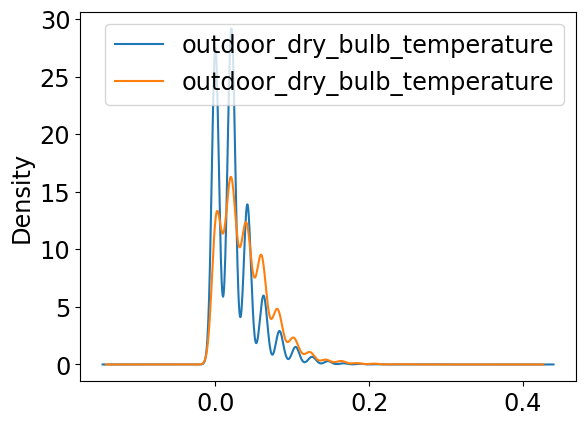

In [9]:
high_var_features = ['outdoor_dry_bulb_temperature','outdoor_dry_bulb_temperature_predicted_6h','outdoor_dry_bulb_temperature_predicted_12h','outdoor_dry_bulb_temperature_predicted_24h']
#turns out the variation in all the temp features is basically the same, because the are the same values just offset
pd.concat([df_abs_diff_bline['outdoor_dry_bulb_temperature'], df_abs_diff_stealthy_sac['outdoor_dry_bulb_temperature']], axis='columns').plot.kde()

<Axes: ylabel='Density'>

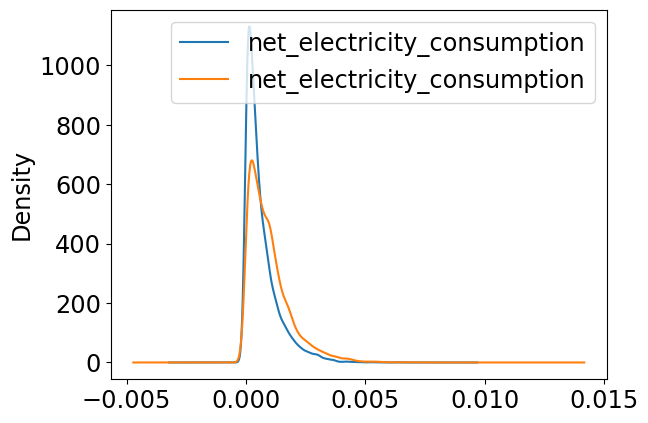

In [10]:
pd.concat([df_abs_diff_bline['net_electricity_consumption'], df_abs_diff_stealthy_sac['net_electricity_consumption']], axis='columns').plot.kde()

Adv consumption is slightly outside the baseline dist, compare to obs from attack to see if power usage or perturbations are to blame

In [11]:
(df_abs_diff_bline['net_electricity_consumption'].max() < df_abs_diff_stealthy_sac['net_electricity_consumption']).sum()

6

In [12]:
df_abs_diff_bline['net_electricity_consumption'].describe()

count    8758.000000
mean        0.000641
std         0.000694
min         0.000000
25%         0.000154
50%         0.000407
75%         0.000885
max         0.006459
Name: net_electricity_consumption, dtype: float64

In [13]:
(0.004 < df_abs_diff_stealthy_sac['net_electricity_consumption']).sum()

101

In [14]:
(0.004 < df_abs_diff_bline['net_electricity_consumption']).sum()

20

In [15]:
(df_abs_diff_bline.max() < df_abs_diff_stealthy_sac).sum().sort_values(ascending=False)

electricity_pricing_predicted_24h             64
electricity_pricing                           64
electricity_pricing_predicted_12h             55
electricity_pricing_predicted_6h              29
electrical_storage_soc                         8
net_electricity_consumption                    6
outdoor_relative_humidity_predicted_24h        2
outdoor_relative_humidity_predicted_6h         2
diffuse_solar_irradiance                       2
carbon_intensity                               1
direct_solar_irradiance                        1
diffuse_solar_irradiance_predicted_24h         1
diffuse_solar_irradiance_predicted_12h         1
diffuse_solar_irradiance_predicted_6h          1
outdoor_dry_bulb_temperature_predicted_6h      1
outdoor_relative_humidity                      1
outdoor_dry_bulb_temperature_predicted_24h     1
outdoor_dry_bulb_temperature_predicted_12h     1
solar_generation                               0
day_type_cos                                   0
day_type_sin        

But only for 6 samples -> negligable

proportion of adv observations whose absolute inter-observation difference is less than that for the clean observations. this is how man observations could be excluded for being outside this range for the original data

In [16]:
df_in_range = df_abs_diff_stealthy_sac.le(df_abs_diff_bline.max())
print(f'The proportion of obs diff in the clean range for all features: {df_in_range.all(axis="columns").sum()/df_abs_diff_stealthy_sac.shape[0]}')

The proportion of obs diff in the clean range for all features: 0.976024660349355


In [17]:
n_false = df_in_range.apply(lambda row: (row == False).sum(), axis='columns').drop(index=0) #first row of NaN from diff operation

Stats for the number of features of of the original range:

In [18]:
n_false[n_false > 0].describe()

count    209.000000
mean       1.153110
std        0.360958
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
dtype: float64

Proportion of samples with more than 1 outlying feature

In [19]:
n_false[n_false > 1].count()/n_false[n_false > 0].shape[0]

0.15311004784688995

In [20]:
df_in_range.drop(index=0)[n_false > 1]

,month_cos,month_sin,day_type_cos,day_type_sin,hour_cos,hour_sin,outdoor_dry_bulb_temperature,outdoor_dry_bulb_temperature_predicted_6h,outdoor_dry_bulb_temperature_predicted_12h,outdoor_dry_bulb_temperature_predicted_24h,...,direct_solar_irradiance_predicted_24h,carbon_intensity,non_shiftable_load,solar_generation,electrical_storage_soc,net_electricity_consumption,electricity_pricing,electricity_pricing_predicted_6h,electricity_pricing_predicted_12h,electricity_pricing_predicted_24h
21,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,False
45,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,False
69,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,False
93,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,False
184,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,False
213,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,False
376,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,False
381,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,False
544,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,False
549,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,False


most of the outliers are in pricing features, except one with SoC and net consumption

Difference between the original and adversarial maximums

In [21]:
df_abs_diff_stealthy_sac.max() - df_abs_diff_bline.max()

month_cos                                     0.000000e+00
month_sin                                     0.000000e+00
day_type_cos                                  0.000000e+00
day_type_sin                                  0.000000e+00
hour_cos                                      0.000000e+00
hour_sin                                      0.000000e+00
outdoor_dry_bulb_temperature                 -8.749940e-03
outdoor_dry_bulb_temperature_predicted_6h     5.000000e-08
outdoor_dry_bulb_temperature_predicted_12h    6.000000e-02
outdoor_dry_bulb_temperature_predicted_24h    6.000000e-02
outdoor_relative_humidity                     1.555553e-02
outdoor_relative_humidity_predicted_6h        5.999997e-02
outdoor_relative_humidity_predicted_12h      -6.249980e-03
outdoor_relative_humidity_predicted_24h       1.305554e-02
diffuse_solar_irradiance                      3.246801e-02
diffuse_solar_irradiance_predicted_6h         1.250000e-03
diffuse_solar_irradiance_predicted_12h        9.968010e-

In [22]:
norms = np.linalg.norm((df_abs_diff_bline.values - df_abs_diff_stealthy_sac.values), ord=np.inf, axis=1)

In [23]:
df_norms = pd.DataFrame()
df_norms['bline'] = np.linalg.norm(df_abs_diff_bline.values, ord=np.inf, axis=1)
df_norms['adv'] = np.linalg.norm(df_abs_diff_stealthy_sac.values, ord=np.inf, axis=1)

<Axes: ylabel='Density'>

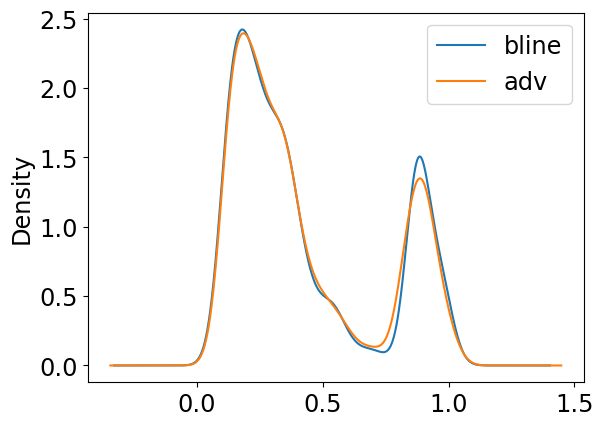

In [24]:
df_norms.plot.kde()

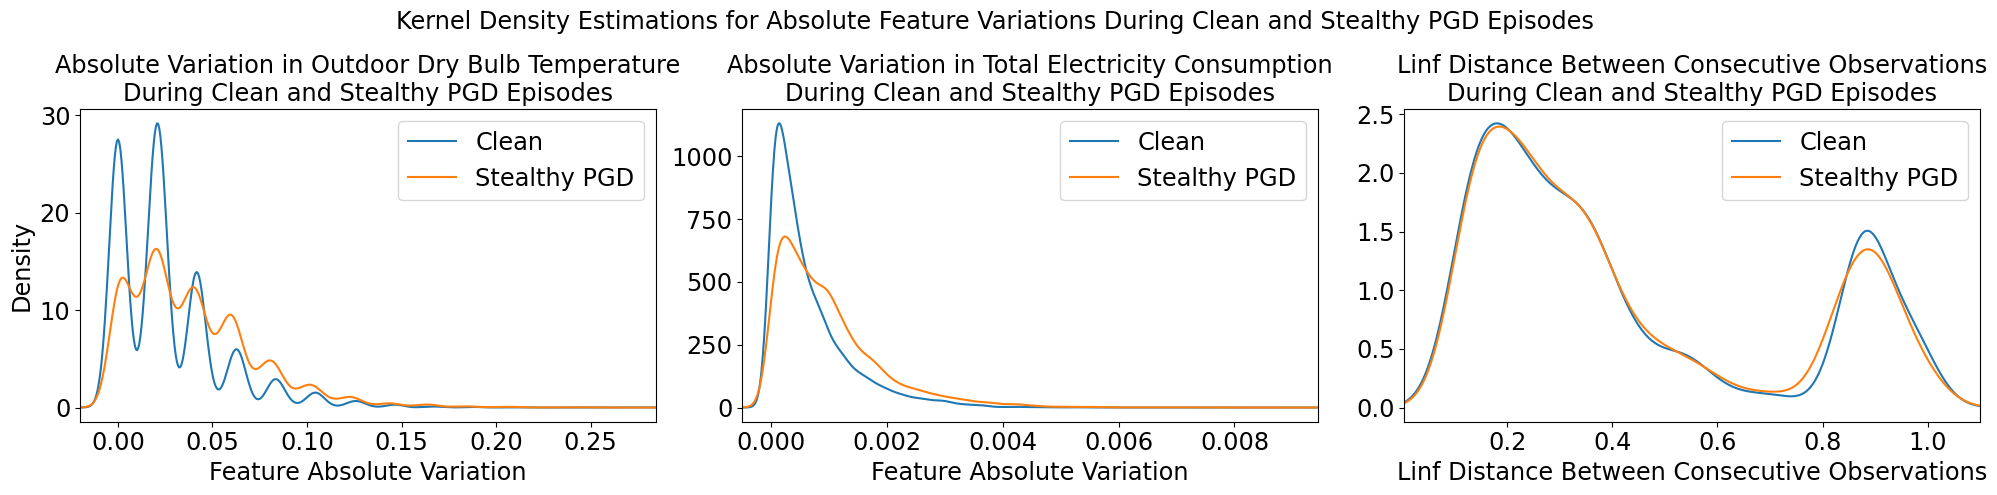

In [27]:
fig = plt.figure(figsize=[20,5],)
fig.suptitle('Kernel Density Estimations for Absolute Feature Variations During Clean and Stealthy PGD Episodes',
             fontsize='xx-large')
plt.subplot(1, 3, 1) #(row, col, plt#)
ax = pd.concat([df_abs_diff_bline['outdoor_dry_bulb_temperature'], df_abs_diff_stealthy_sac['outdoor_dry_bulb_temperature']], axis='columns').plot.kde(
    title='Absolute Variation in Outdoor Dry Bulb Temperature\nDuring Clean and Stealthy PGD Episodes',
    xlim=(df_abs_diff_stealthy_sac['outdoor_dry_bulb_temperature'].min() - 0.02, df_abs_diff_stealthy_sac['outdoor_dry_bulb_temperature'].max()),
    ax=plt.gca(), #get current axis
)
ax.legend(['Clean','Stealthy PGD'])
ax.set_xlabel('Feature Absolute Variation')
plt.subplot(1, 3, 2)
ax = pd.concat([df_abs_diff_bline['net_electricity_consumption'], df_abs_diff_stealthy_sac['net_electricity_consumption']], axis='columns').plot.kde(
    title='Absolute Variation in Total Electricity Consumption\nDuring Clean and Stealthy PGD Episodes',
    xlim=(df_abs_diff_stealthy_sac['net_electricity_consumption'].min() - 5e-4, df_abs_diff_stealthy_sac['net_electricity_consumption'].max()),
    ax=plt.gca(), #get current axis
)
ax.legend(['Clean','Stealthy PGD'])
ax.set_xlabel('Feature Absolute Variation')
ax.set_ylabel(None)

plt.subplot(1, 3, 3) #(row, col, plt#)
ax = df_norms.plot.kde(
    title='Linf Distance Between Consecutive Observations\nDuring Clean and Stealthy PGD Episodes',
    xlim=(df_norms.min().min() - 0.1, df_norms.max().max() + 0.1),
    ax=plt.gca(), #get current axis
)
ax.legend(['Clean','Stealthy PGD'])
ax.set_xlabel('Linf Distance Between Consecutive Observations')
ax.set_ylabel(None)

plt.tight_layout()